<a href="https://colab.research.google.com/github/jh6695/study/blob/main/%EC%9E%90%EC%97%B0%EC%96%B4_4_%EB%B2%A1%ED%84%B0%EC%9D%98_%EC%9C%A0%EC%82%AC%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#1. 코사인 유사도

-1~1의 값을 가짐.1에 가까울수록 유사도가 크다.


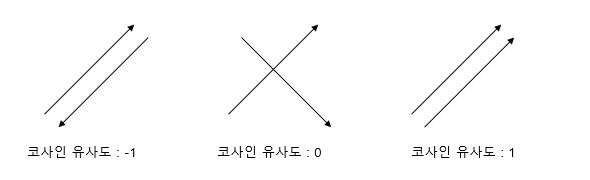

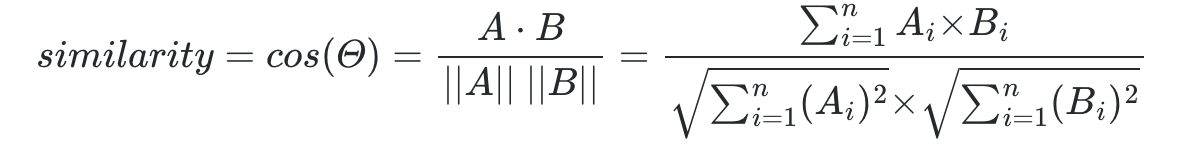

In [8]:
#넘파이를 이용한 코사인 유사도
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A,B):
  return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


문서 2와 3의 유사도는 거의 1이다. 문서 3은 문서 2보다 빈도수가 1씩 증가했을 뿐이기 때문.

문사의 길이에 영항을 받는 유클리드 거리 유사도보다 벡터의 방향에 초첨을 둔 코사인 유사도가 길이가 다른 문서에서 비교적 공정한 판단 가능.

#2. 유사도를 이용한 추천 시스템 구현하기
https://www.kaggle.com/rounakbanik/the-movies-dataset

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd

# CSV 파일 읽기
data = pd.read_csv('/content/drive/MyDrive/archive/movies_metadata.csv')
data.head(2)

<ipython-input-10-b464d6a46917>:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/archive/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


title 열과 overviwe 열을 이용해 코사인 유사도 사용.

영화를 입력하면 유사한 줄거리를 찾아 영화를 추천하는 시스템.

In [11]:
#상위 20000개 데이터로 분석
data = data.head(20000)

In [12]:
#결측값 확인
data['overview'].isnull().sum()

135

In [13]:
#결측값 공백으로 대체
data['overview'] = data['overview'].fillna('')

In [14]:
data['overview'].isnull().sum()

0

In [15]:
#overview 열에 대해 TF-IDF 행렬 생성
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('행렬의 크기: ', tfidf_matrix.shape) #20000개의 영화를 표현하기 위해 47487개의 단어 사용. 47487 차원의 문서 벡터가 20000개.

행렬의 크기:  (20000, 47487)


In [16]:
#overview 열에 대해 상호 유사도 확인
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cos_sim.shape)

(20000, 20000)


In [19]:
#기존 데이터에서 영화 제목을 key, 인덱스를 value로 하는 딕셔너리 생성
title_to_index = dict(zip(data['title'], data.index))
print(title_to_index['Father of the Bride Part II'])

4


In [20]:
#영화 제목 입력하면 줄거리가 유사한 영화 상위 10개를 추출하는 시스템
def get_recommendations(title, cos_sim=cos_sim):
  #영화의 타이틀로부터 인덱스 추출
  idx = title_to_index[title]
  #해당 영화와 모든 영화와의 유사도 추출
  sim_scores = list(enumerate(cos_sim[idx]))
  #유사도 기준 내림차순 정렬
  sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True)
  #가장 유사한 영화 10개 추출
  sim_scores = sim_scores[:11]
  #가장 유사한 영화의 인덱스 추출
  movie_indices = [idx[0] for idx in sim_scores]
  #가장 유사한 영화 제목 리턴
  return data['title'].iloc[movie_indices]


In [21]:
get_recommendations('The Dark Knight Rises')

18252                      The Dark Knight Rises
12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object

#유클리드 거리



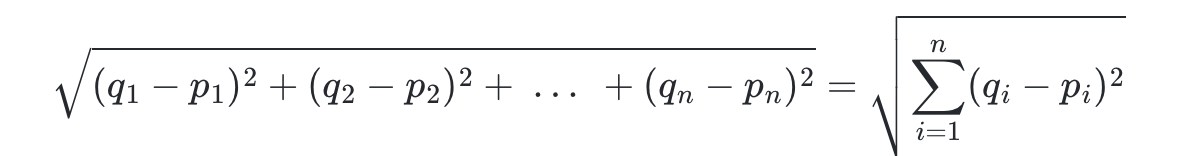

In [25]:
#파이썬 코드로 구현하기
import numpy as np

def dist(x,y):
  return np.sqrt(np.sum((x-y)**2))


doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docQ = np.array((1,1,0,1))

print('문서1과 문서Q의 거리 :',dist(doc1,docQ))
print('문서2과 문서Q의 거리 :',dist(doc2,docQ))
print('문서3과 문서Q의 거리 :',dist(doc3,docQ))

문서1과 문서Q의 거리 : 2.23606797749979
문서2과 문서Q의 거리 : 3.1622776601683795
문서3과 문서Q의 거리 : 2.449489742783178


값이 작다는 것은 문서간 거리가 짧다는 것을 의미한다. 문서 Q는 문서 1과 가장 유사함.

#자카드 유사도



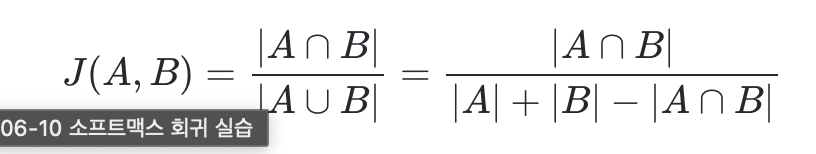

0과 1 사이의 값을 가진다.

In [28]:
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

#토큰화

token_1 = doc1.split()
token_2 = doc2.split()

print(token_1)
print(token_2)

['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
['apple', 'banana', 'coupon', 'passport', 'love', 'you']


In [29]:
#합집합
union = set(token_1).union(set(token_2)) #set(): 집합 만들기
union

{'apple',
 'banana',
 'card',
 'coupon',
 'everyone',
 'holder',
 'like',
 'likey',
 'love',
 'passport',
 'watch',
 'you'}

In [30]:
#교집합
intersection = set(token_1).intersection(set(token_2))
intersection

{'apple', 'banana'}

In [31]:
print('자카드 유사도:', len(intersection)/len(union))

자카드 유사도: 0.16666666666666666
